In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt

# **Обзор продаж игр**

> Используем датасет [Video Games Sales](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings). 



Загрузим набор данных и выведем первые строки в качестве примера

In [61]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Video_Games_Sales.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Выведем подробную информацию о наборе данных, его объеме и содержимом

In [18]:
print(data.info())
data.describe(include = ['int', 'object', 'float'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16450 non-null  object 
 2   Year_of_Release  16450 non-null  int64  
 3   Genre            16448 non-null  object 
 4   Publisher        16418 non-null  object 
 5   NA_Sales         16450 non-null  float64
 6   EU_Sales         16450 non-null  float64
 7   JP_Sales         16450 non-null  float64
 8   Other_Sales      16450 non-null  float64
 9   Global_Sales     16450 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       9840 non-null   object 
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 2.6+ MB
N

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16448,16450,16450.000000,16448,16418,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,7983.000000,7983.000000,9840,7463.000000,9907,9769
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922
mean,NaN,NaN,2006.487356,NaN,NaN,0.264041,0.145909,0.078464,0.047582,0.536252,68.994363,26.441313,NaN,163.015141,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.818324,0.506639,0.311046,0.187973,1.558437,13.920060,19.008136,NaN,563.863327,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


Оценим количество пропусков в наборе данных

In [7]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Так как в основном анализ данных будет проводиться относительно года выхода, удалим те записи, в которых поле пропущено:

In [8]:
data = data[data['Year_of_Release'].notna()]

Количество уникальных лет, когда была совершена покупка:

In [11]:
data['Year_of_Release'].nunique()

39

In [13]:
data['Year_of_Release'] = data['Year_of_Release'].astype(int)

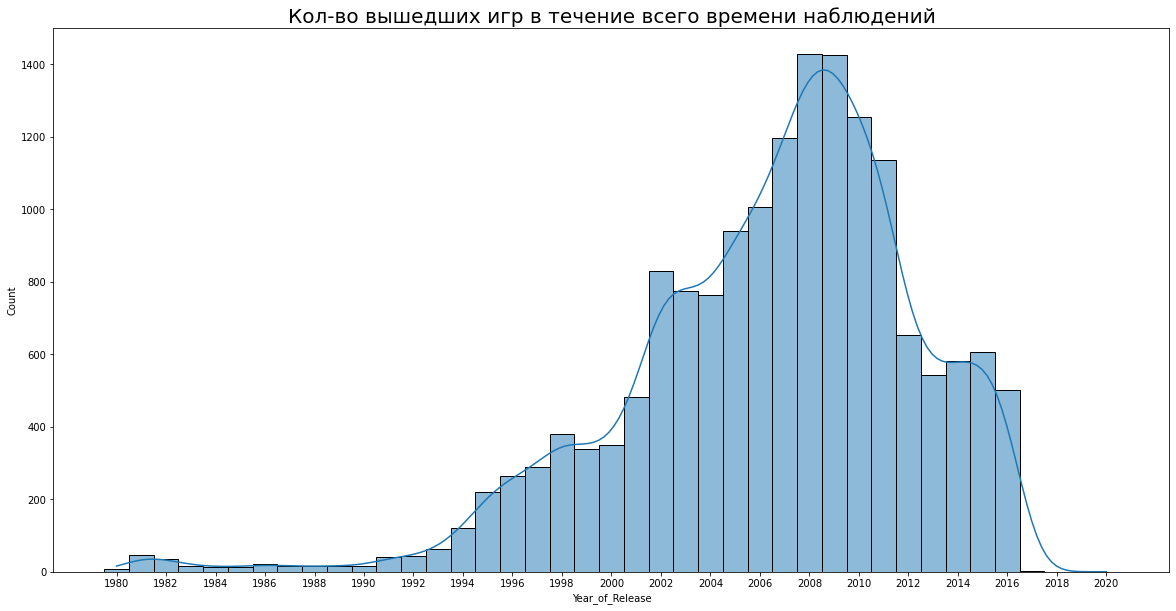

In [17]:
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
fig1 = sns.histplot(x = data['Year_of_Release'], ax = ax, kde = True, discrete = True)
fig1.set_xticks(range(data['Year_of_Release'].min(), data['Year_of_Release'].max()+1, 2))
fig1.set_title("Кол-во вышедших игр в течение всего времени наблюдений", {'fontsize' : 20})
fig1

> На графике видно, что исторически с развитием технологий активность безусловно увеличилась. Также можно отметить следующее наблюдение:
- После 2008 года активность упала.

In [19]:
yearly_sum = data.groupby('Year_of_Release').sum()

In [20]:
yearly_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,,,,,,,,
1980,10.59,0.67,0.00,0.12,11.38,0.0,0.0,0.0
1981,33.40,1.96,0.00,0.32,35.77,0.0,0.0,0.0
1982,26.92,1.65,0.00,0.31,28.86,0.0,0.0,0.0
1983,7.76,0.80,8.10,0.14,16.79,0.0,0.0,0.0
1984,33.28,2.10,14.27,0.70,50.36,0.0,0.0,0.0
1985,33.73,4.74,14.56,0.92,53.94,59.0,9.0,19.0
1986,12.50,2.84,19.81,1.93,37.07,0.0,0.0,0.0
1987,8.46,1.41,11.63,0.20,21.74,0.0,0.0,0.0
1988,23.87,6.59,15.76,0.99,47.22,64.0,75.0,4572.0


In [21]:
yearly_sum.to_csv('yearly_sum.csv')

In [22]:
yearly_sum = pd.read_csv('yearly_sum.csv')

In [ ]:
yearly_sum['Global_Sales'] = yearly_sum['Global_Sales']
yearly_sum['Year_of_Release'] = yearly_sum['Year_of_Release']

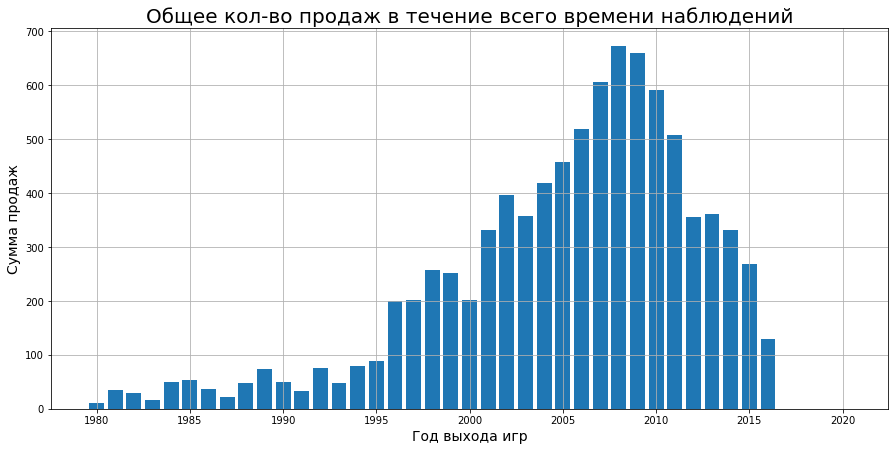

In [65]:
plt.figure(figsize = (15,7))
plt.bar(yearly_sum['Year_of_Release'], yearly_sum['Global_Sales'])
plt.xlabel('Год выхода игр', fontsize=14)
plt.ylabel('Сумма продаж', fontsize=14)
plt.title('Общее кол-во продаж в течение всего времени наблюдений', {'fontsize' : 20})
plt.grid()
plt.show()

> В 2008 году было куплено больше всего игр.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

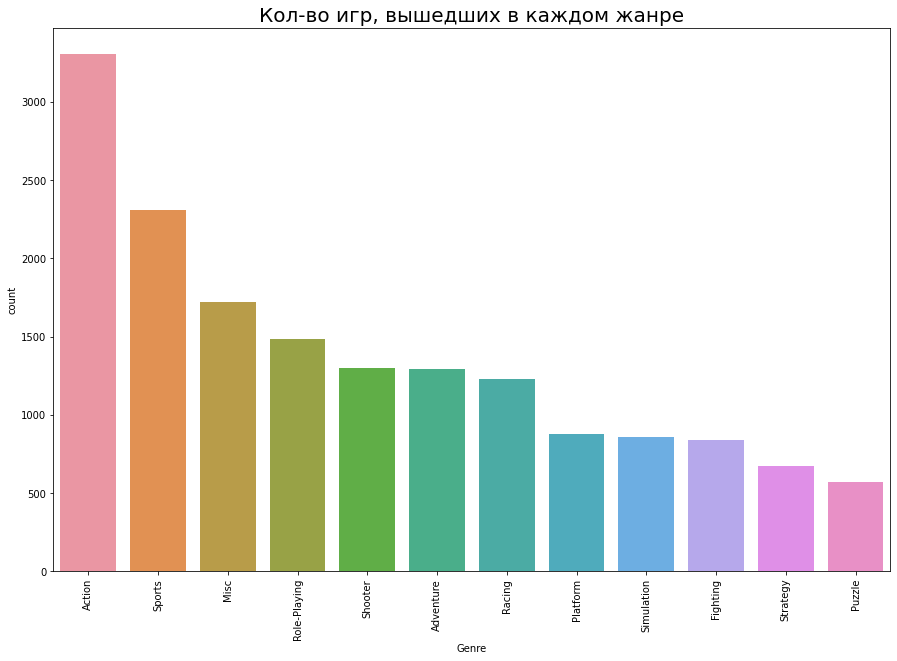

In [29]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.title('Кол-во игр, вышедших в каждом жанре', {'fontsize' : 20})
plt.xticks(rotation=90)

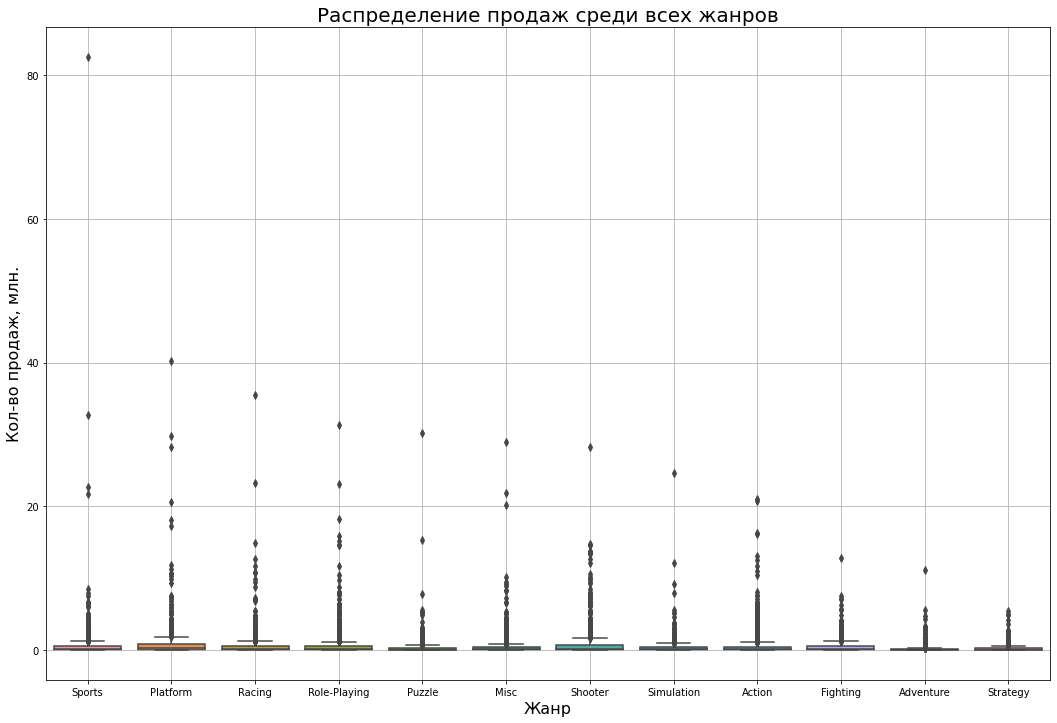

In [30]:
dims = (18, 12)
fig, ax = plt.subplots(figsize=dims)
fig1 = sns.boxplot( x = data["Genre"], y = data["Global_Sales"])
fig1.set_title('Распределение продаж среди всех жанров', {'fontsize' : 20})
plt.grid()
plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Кол-во продаж, млн.', fontsize=16)
fig1

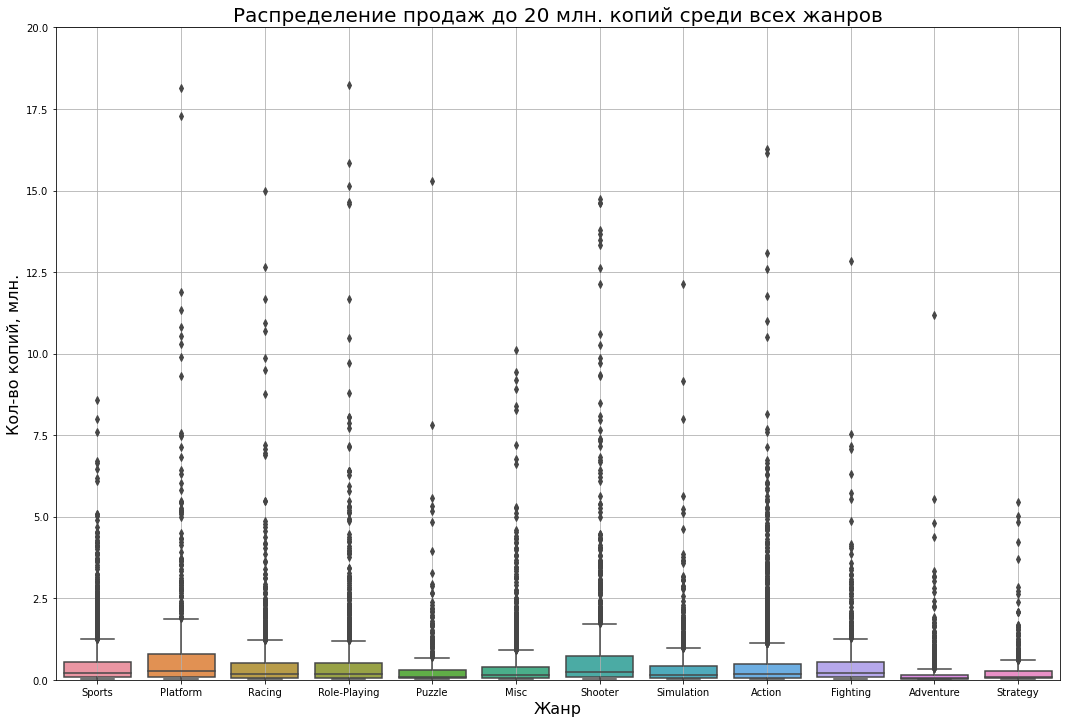

In [31]:
dims = (18, 12)
fig, ax = plt.subplots(figsize=dims)
fig1 = sns.boxplot( x = data["Genre"], y = data["Global_Sales"])
fig1.set_title('Распределение продаж до 20 млн. копий среди всех жанров', {'fontsize' : 20})
plt.grid()
ax.set_ylim(bottom = 0, top = 20)
plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Кол-во копий, млн.', fontsize=16)
fig1

In [54]:
data_by_year = data.groupby(by  = 'Year_of_Release').sum()
data_by_year.drop(columns=["Critic_Count", "User_Count", "Critic_Score"],inplace=True)
data_by_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36
1985,33.73,4.74,14.56,0.92,53.94
1986,12.50,2.84,19.81,1.93,37.07
1987,8.46,1.41,11.63,0.20,21.74
1988,23.87,6.59,15.76,0.99,47.22


Text(0.5, 0, 'Год выхода')

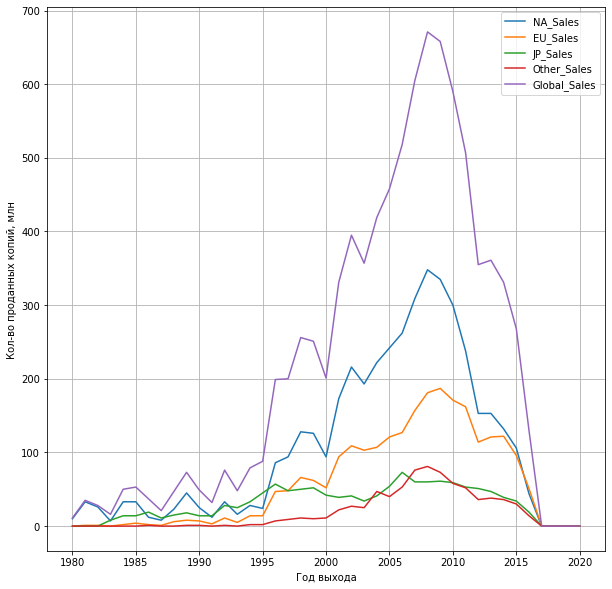

In [56]:
data_by_year=data_by_year.apply(lambda x : x.astype("int"))
data_by_year.plot.line(figsize=(10,10), grid="on")
plt.ylabel("Кол-во проданных копий, млн")
plt.xlabel("Год выхода")

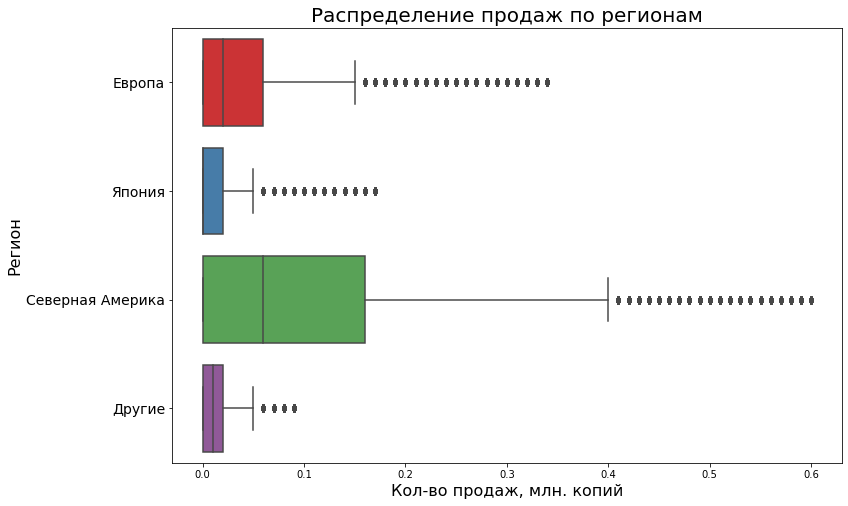

In [58]:
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['Европа', 'Япония', 'Северная Америка', 'Другие']
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Кол-во продаж, млн. копий', fontsize=16)
ax.set_ylabel(ylabel='Регион', fontsize=16)
ax.set_title(label='Распределение продаж по регионам', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

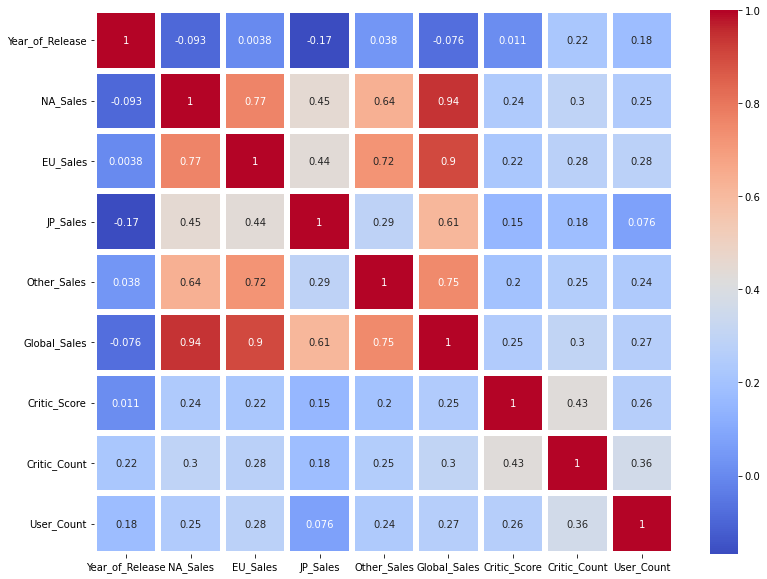

In [64]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "coolwarm", annot=True, linewidth=5)

Сильная корреляция продаж между собой - логично. Остальные признаки не коррелируют